In [7]:
library(dplyr)
library(data.table)
library(tidyr)
library(ggplot2)
library(ggrepel)
library(svglite)

In [8]:
df = fread(cmd="cat ./data.txt | sed 's/,//g' ") %>%
    separate(col = file, into = c("A","B","C","keepPositionsFraction","topNperchaving_sequences_to_remove"),sep = "_|\\.fa",convert=T)
df$A <- NULL
df$B <- NULL
df$C <- NULL

#initial sizes
niniSeqs = 615034  
inilength = 29903
df$num_seqsrel = df$num_seqs/niniSeqs*100
df$lenrel = df$avg_len/inilength*100
head(df)

Warning message:
“Expected 5 pieces. Additional pieces discarded in 16 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16].”


keepPositionsFraction,topNperchaving_sequences_to_remove,format,type,num_seqs,sum_len,min_len,avg_len,max_len,num_seqsrel,lenrel
<dbl>,<int>,<chr>,<chr>,<int>,<int64>,<int>,<int>,<int>,<dbl>,<dbl>
0.7,10,FASTA,DNA,454387,10060582567,22141,22141,22141,73.87998,74.04274
0.7,20,FASTA,DNA,424988,9545655468,22461,22461,22461,69.09992,75.11286
0.7,2,FASTA,DNA,469078,9842194596,20982,20982,20982,76.26863,70.16687
0.7,5,FASTA,DNA,462825,9801245025,21177,21177,21177,75.25194,70.81898
0.8,10,FASTA,DNA,438258,9936623634,22673,22673,22673,71.25752,75.82182
0.8,20,FASTA,DNA,416523,9454655577,22699,22699,22699,67.72357,75.90877


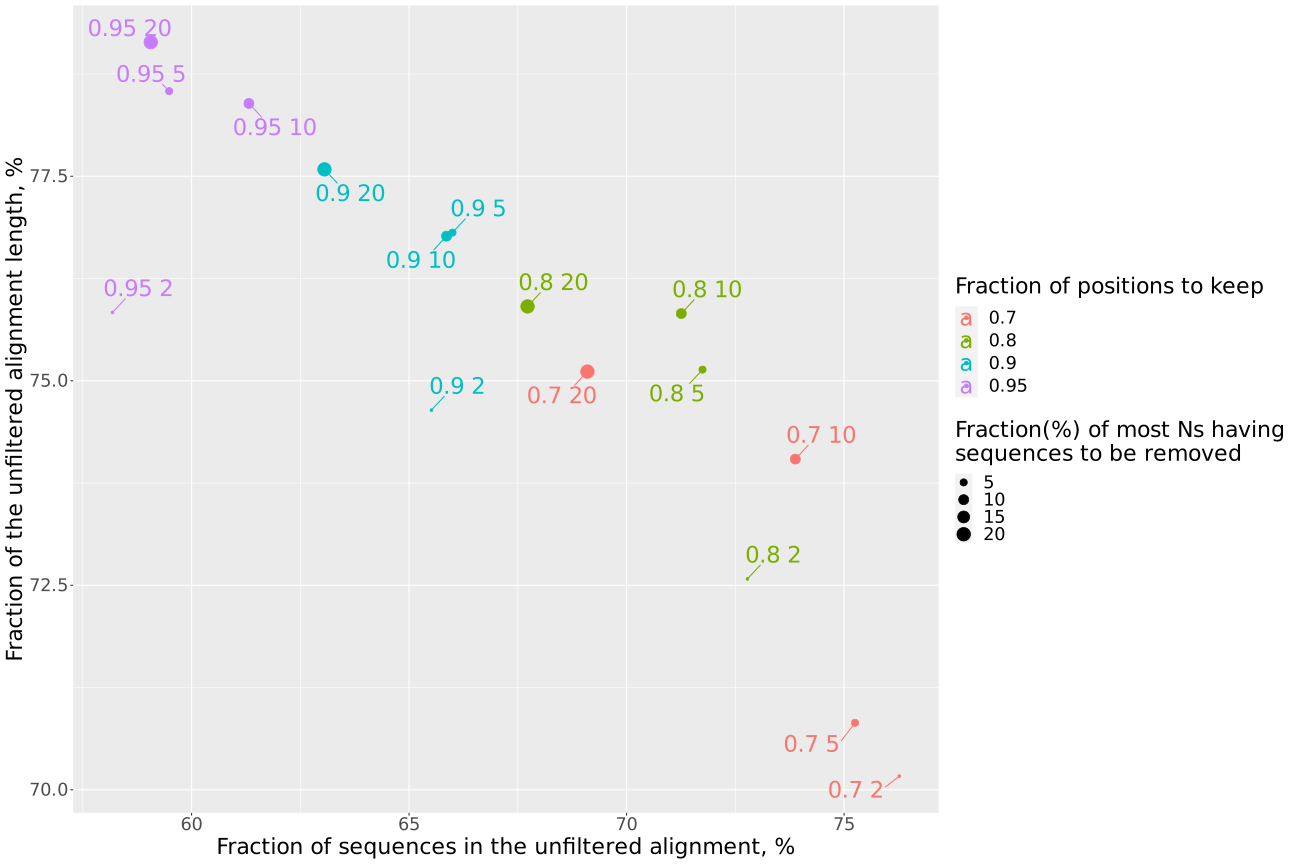

In [17]:
options(repr.plot.width=18, repr.plot.height=12,jupyter.plot_mimetypes = "image/svg+xml")
p <- ggplot(data=df,aes(x=num_seqsrel,y=lenrel,color=factor(keepPositionsFraction),label=paste(keepPositionsFraction,topNperchaving_sequences_to_remove))) + 
theme(text = element_text(size=22),
        axis.text.x = element_text(angle=0)) +

xlab("Fraction of sequences in the unfiltered alignment, %") +
ylab("Fraction of the unfiltered alignment length, %") +
geom_point(aes(size = topNperchaving_sequences_to_remove)) +
geom_text_repel(
    size = 8,
    point.padding = 0, # additional padding around each point
    min.segment.length = 0, # draw all line segments
    max.time = 1, max.iter = 1e5, # stop after 1 second, or after 100,000 iterations
    box.padding = 1 # additional padding around each text label
)+
labs(
    color="Fraction of positions to keep",
    size = "Fraction(%) of most Ns having\nsequences to be removed"
   )
p
ggsave("parameter_opt.svg",plot = p, width = 18, height = 12)